<a href="https://colab.research.google.com/github/dustin-py/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [107]:
import re
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp


house_votes = pd.read_csv('house-votes-84.data', header=None, na_values='?')
# display(house_votes.head())


#print(house_votes.shape)


with open('house-votes-84.names','r') as file:
    names_file = file.read()
    # print(names_file)


cols = ['party','handicap-infants','water-project-cost-sharing',
        'adoption-of-the-budget-resolution','physician-fee-freeze',
        'el-salvador-aid','religious-groups-in-schools',
        'anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile',
        'immigration','synfuels-corporation','education-spending',
        'superfund-right-to-sue','crime','duty-free-exports',
        'export-administration-act-south-africa']


house_votes.columns = cols
# house_votes.head()


house_votes = house_votes.aggregate(lambda x: x.map({'republican':0,
                                                     'democrat':1,
                                                     'y':1,
                                                     'n':0,}))


print(house_votes['religious-groups-in-schools'].value_counts().describe())


count      2.000000
mean     212.000000
std       84.852814
min      152.000000
25%      182.000000
50%      212.000000
75%      242.000000
max      272.000000
Name: religious-groups-in-schools, dtype: float64


NULL HYPOTHESIS: 
Democrats and Republicans have the same stance on 'religious-groups-in-schools.

ALT HYPOTHESIS: (1-tailed) 
Republicans will have a higher yes votes on the topic than Democrats

(168, 17)
(267, 17)
0.8975903614457831
0.47674418604651164
166
258


Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)

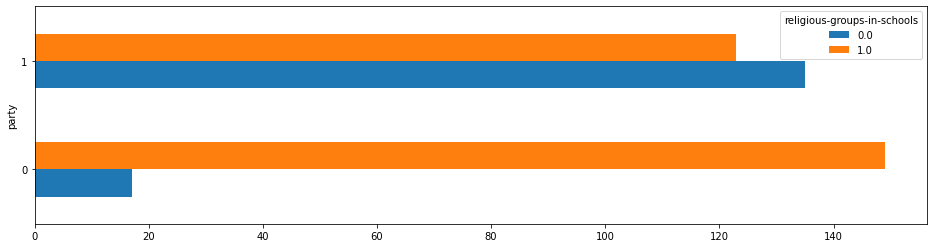

In [112]:
print("NULL HYPOTHESIS:",
      "\nDemocrats and Republicans have the same stance on 'religious-groups-in-schools.")
print("\nALT HYPOTHESIS: (1-tailed)",
      "\nRepublicans will have a higher yes votes on the topic than Democrats\n")


compare = pd.crosstab(house_votes.party,house_votes['religious-groups-in-schools'])
compare.plot(kind='barh',figsize=(16,4))


house_votes.groupby('party')['religious-groups-in-schools'].mean()


republican = house_votes[house_votes['party']==0]
democrat = house_votes[house_votes['party']==1]
print(republican.shape)
print(democrat.shape)


print(republican['religious-groups-in-schools'].mean())
print(democrat['religious-groups-in-schools'].mean())


col = republican['religious-groups-in-schools']
rep_religious_groups_in_schools_no_nans = col[~np.isnan(col)]

col = democrat['religious-groups-in-schools']
dem_religious_groups_in_schools_no_nans = col[~np.isnan(col)]

print(len(rep_religious_groups_in_schools_no_nans))
print(len(dem_religious_groups_in_schools_no_nans))


ttest_ind(republican['religious-groups-in-schools'],
          democrat['religious-groups-in-schools'],
          nan_policy='omit')


In [109]:
republican

,party,handicap-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
430,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
432,0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,1.0


## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!